# Aprendizaje no supervisado

## Clustering por K-Means

In [83]:
#Cargamos las librerias necesarias para el ejemplo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from summarytools import dfSummary

In [84]:
#Cargamos el dataset que contiene informacion bancaria y tarjetas de cuentahabientes
dataset = pd.read_csv('BankChurners.csv')

In [85]:
#Desplegamos un summary de la descripcion estadistica de las variables numericas del dataset
dataset.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [86]:
#Desplegamos un summary mas completo y visual de todas las variables del dataset para iniciar la exploracion de datos
dfSummary(dataset)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CLIENTNUM[int64],Mean (sd) : 739177606.3 (36903783.5)min < med < max:708082083.0 < 717926358.0 < 828343083.0IQR (CV) : 60106762.5 (20.0),"10,127 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC40lEQVR4nO3YsW7aUBSA4XMhQdcQ7hUhJVuWbonUASkLD9AxD5tH6MDQtRm6MGWJUBAyjYOFZdyhTdWqCuBrEDnk/2aObVm/uAdMURQCvHW1fT8AsImjdR8wxkQi0gi8/qIoinngLPDHylCNMVG3271xznVCLj6bzabGmFtiRVXrvlEbzrnOYDCYe+/TMheO49gOh8POZDJpiAihopK1R7+IiPc+7fV6zwHXjwJmgP/wYwoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQ4WjfD3CIjDGRiDQCxxdFUcy3+TyHgFC3zBgTdbvdG+dcJ2R+NptNjTG3xPovQt2+hnOuMxgM5t77tMxgHMd2OBx2JpNJQ0QI9S87DTXP82MRccaY0EuoPQa992mv13suO5fnuZN3+s5W2VmoSZIcZ1n26eLiol6v10t9s7x4b8cg7+x1Owt1sVgcWWub/X4/PT8/n5adf4/HIO/sdTvfUVutVtAR+Fu01YdRYl/vrOK/FSK//u5cBs6uXFn4MXVgKvwusKenp5+9963Q+yZJ8vHk5GRUq9WysvPrVhZCPSBVdtwsy6yIXF1fX389Ozublb33/f195+7u7kO/3/9edm3ZZGUh1FdUOAbdcrk83vbzbKLKjvs7tKa1NgtZO6bTaSRSaW1ZubK86VAr/r1VZV8KPgazLLN5nl+lafpFREL3zEpCYnkJ7a3aKNQ4jm3ZCz89PVkRkSRJ7Hg8bpadf3h4aIceY1X3pZdj8PLy8lu73f5RZvbx8dGORqNmHMet8Xi8KDNb9Z1Vmd/nvTfp6yeJ80MUZUbkNQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Attrition_Flag[object],1. Existing Customer2. Attrited Customer,"8,500 (83.9%)1,627 (16.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABMUlEQVR4nO3bQWrDMBRF0adiQjORMAYvxovoYrsI7cYYa9CETNRByRL+swr3bOAHchNI8Eu9dwEOSdJd0u3qF4LLvXrvj8gD07IsXznnOfIIxtdaO1JK35HBTTnnedu2RynlGXUEYzvP87PWOu/7fpMUF5sklVKe67r+RB3Bv3CPPvARfQB4IzbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwWaS/h6eu/qF4Dqu939qrR211lmGh+cwrtbaIekVeYPBC97CBy+JKR9cXN9s4Z8ajM8y5XPMxDC+8CmfayaG8bmmfPzSBX/qwofYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAab8CkfM0G8WaZ8jpkYxsfgBTa/Cltq33c4jS0AAAAASUVORK5CYII="">",0(0.0%)
3,Customer_Age[int64],Mean (sd) : 46.3 (8.0)min < med < max:26.0 < 46.0 < 73.0IQR (CV) : 11.0 (5.8),45 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3dPY7aQBiH8f+EDxmQbCEk6LhApBSUHCKHzRFScAJuQIe0QiC862CMU6SKBLvgj915h+fXT9bFI2RPxq9dWZYCfPftqy8AuEf3qy/AV865gaR+xeWnsizfmryeZ0eoVzjnBpPJ5Gccx+Mq6w+Hw84594tYm0Oo1/XjOB4vl8u3JEmyRxbu9/totVqNX15e+pIItSGE+o4kSbLpdPpaYemg8Yt5cjxMwQRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJ/BdqC4qi6EmKnXNVlnPy6gpCbViapr08z3/M5/NOp9N56ECLxMmrWwi1YafTqRtF0XCxWGSz2Wz3yFpOXt1GqC0ZjUacvGpQsKHWPKEfXy6XXpPXg3qCDLXuCf08z6OiKL5nWfZbUpVfRTQsyFBV44S+JG02m/F6vR6ez+dOGxeHx4UaqqTqJ/R3ux33iZ5hwx8mECpMIFSYQKgwweuHqRp7oeyDBsbbUOvshbIPGh5vQ1WNvVD2QcPjc6iSqu2Fsg8aHh6mYAKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTvD+U8mxqzq2SAp1dRageqTu3Sgp3dhWheqTO3Cop7NlVhOqhGnOrpEBnV/EwBRMIFSYQKkxo9R6V0Y9oSmuhMvoRTWrzF5XRj2hM69tTjH78XKF+kYV91ICE/EUWQg1IyF9kIdQAhfhFFvZRYQKhwgRChQmEChM+fJhi6jN88G6oTH2GLz76RWXqM7xw1z4qU5+fg88vFrLhD0n+v1hIqJDk/4uFhIr/+Ppi4V2h7vf76NF/+Hg8RpKUpmm03W6Hn7ne6t+2et3Sv0aKouiq+j3un7Isb95y/AUcdZM5QwCg9AAAAABJRU5ErkJggg=="">",0(0.0%)
4,Gender[object],1. F2. M,"5,358 (52.9%)4,769 (47.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABO0lEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa5CETJRBx8GCiie7vWcFH3MxJPi5UooBCs7MrmZ26X3IH/Aspdx7H3FkfhzHrxDC0PuQs8s5r865b4J7z4cQhnme7zHGR+9jzmrbts+U0rAsy8XMiO0Nb2YWY3xM03TrfczJXXsfcHQfvQ/A/0FskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoOMN/v5+K/3IWfG86vjc85rSmkwPv77lZzzambP3nccGYOXdh

In [87]:
#Encontramos todas las columnas numericas

cols_num = [col for col in dataset.columns 
                        if((dataset[col].dtypes=='float64') or (dataset[col].dtypes=='int64'))]
cols_num

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

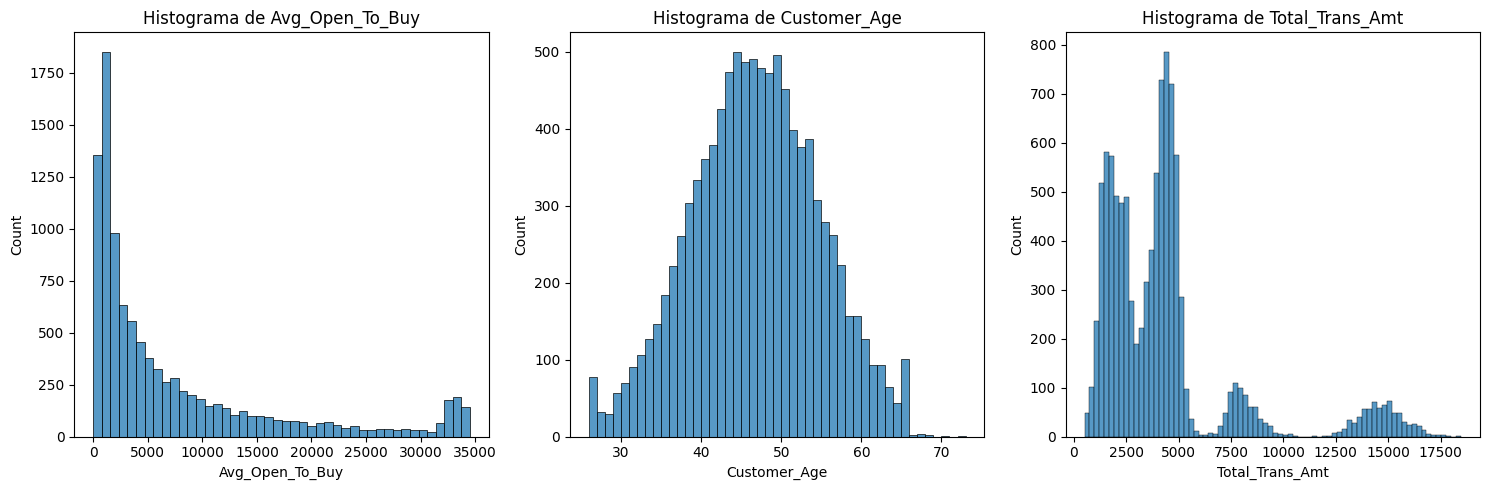

In [88]:
#Visualizamos las columnas numericas que nos interesan ingresar al modelo para tener una mayor perspectiva

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=dataset, x='Avg_Open_To_Buy', ax=axes[0])
axes[0].set_title('Histograma de {}'.format('Avg_Open_To_Buy'))

sns.histplot(data=dataset, x='Customer_Age', ax=axes[1])
axes[1].set_title('Histograma de {}'.format('Customer_Age'))

sns.histplot(data=dataset, x='Total_Trans_Amt', ax=axes[2])
axes[2].set_title('Histograma de {}'.format('Total_Trans_Amt'))

plt.tight_layout()
plt.show()

In [89]:
#Para el aprendizaje no supervisado se utilizan unicamente variables numericas
#Se deben escoger de acuerdo al giro del negocio y lo que se quiere encontrar
#En este caso elegimos las 3 que graficamos anteriormente
data_clean = dataset[['Total_Trans_Amt','Avg_Open_To_Buy','Customer_Age']]
data_clean

,Total_Trans_Amt,Avg_Open_To_Buy,Customer_Age
0,1144,11914.0,45
1,1291,7392.0,49
2,1887,3418.0,51
3,1171,796.0,40
4,816,4716.0,40
...,...,...,...
10122,15476,2152.0,50
10123,8764,2091.0,41
10124,10291,5409.0,44
10125,8395,5281.0,30


In [90]:
data_clean.describe()
# vamos a tener que normalizar los datos porque tienen rangos muy distintos

,Total_Trans_Amt,Avg_Open_To_Buy,Customer_Age
count,10127.000000,10127.000000,10127.000000
mean,4404.086304,7469.139637,46.325960
std,3397.129254,9090.685324,8.016814
min,510.000000,3.000000,26.000000
25%,2155.500000,1324.500000,41.000000
50%,3899.000000,3474.000000,46.000000
75%,4741.000000,9859.000000,52.000000
max,18484.000000,34516.000000,73.000000


<Axes: >

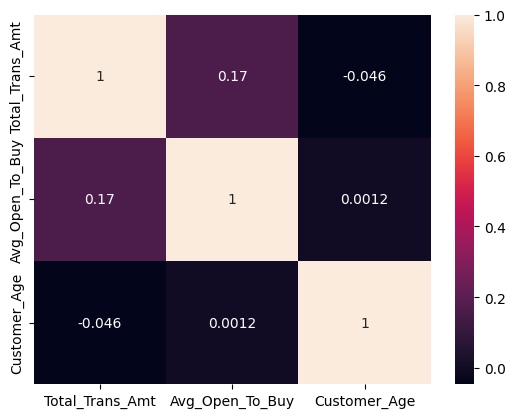

In [91]:
sns.heatmap(data_clean[['Total_Trans_Amt','Avg_Open_To_Buy','Customer_Age']].corr(),annot = True)
# buscamos que nuestras variables no tengan correlacion alta
# eso querria decir que tenemos dos variables que explican lo mismo, es como trabajar solo con dos variables
# en este caso nuestras variables estan muy poco correlacionadas entonces si nos sirven

#### Quitando Outliers

In [92]:
#Creamos un loop para encontrar los outliers en cada variable
#Primero determinamos el quartil1 y quartil3 de cada variable para calcular el limite interquantil
#Los limites inferior y superior se calculan con esos datos
#Agregamos una columna al dataset para definir si cada valor se ecuentra fuera de los limites
for col in data_clean.columns:
    column = data_clean[col]

    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3-Q1
    inf = Q1-1.5*IQR
    sup = Q3+1.5*IQR

    data_clean[col + '_outliers'] = (column < inf) | (column > sup)



    print(f'{Q1 = },  {Q3 = }, {inf = }, {sup = }')

Q1 = 2155.5,  Q3 = 4741.0, inf = -1722.75, sup = 8619.25
Q1 = 1324.5,  Q3 = 9859.0, inf = -11477.25, sup = 22660.75
Q1 = 41.0,  Q3 = 52.0, inf = 24.5, sup = 68.5


C:\Users\pablo\AppData\Local\Temp\ipykernel_2992\3374694694.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col + '_outliers'] = (column < inf) | (column > sup)
C:\Users\pablo\AppData\Local\Temp\ipykernel_2992\3374694694.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col + '_outliers'] = (column < inf) | (column > sup)
C:\Users\pablo\AppData\Local\Temp\ipykernel_2992\3374694694.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [93]:
#Visualizamos la data con las nuevas columnas
data_clean

,Total_Trans_Amt,Avg_Open_To_Buy,Customer_Age,Total_Trans_Amt_outliers,Avg_Open_To_Buy_outliers,Customer_Age_outliers
0,1144,11914.0,45,False,False,False
1,1291,7392.0,49,False,False,False
2,1887,3418.0,51,False,False,False
3,1171,796.0,40,False,False,False
4,816,4716.0,40,False,False,False
...,...,...,...,...,...,...
10122,15476,2152.0,50,True,False,False
10123,8764,2091.0,41,True,False,False
10124,10291,5409.0,44,True,False,False
10125,8395,5281.0,30,False,False,False


In [94]:
#contamos cuantos datos se pasan de los outliers
data_clean.groupby(by='Total_Trans_Amt_outliers').count()

,Total_Trans_Amt,Avg_Open_To_Buy,Customer_Age,Avg_Open_To_Buy_outliers,Customer_Age_outliers
Total_Trans_Amt_outliers,,,,,
False,9231,9231,9231,9231,9231
True,896,896,896,896,896


In [95]:
#contamos cuantos datos se pasan de los outliers
data_clean.groupby(by='Avg_Open_To_Buy_outliers').count()

,Total_Trans_Amt,Avg_Open_To_Buy,Customer_Age,Total_Trans_Amt_outliers,Customer_Age_outliers
Avg_Open_To_Buy_outliers,,,,,
False,9164,9164,9164,9164,9164
True,963,963,963,963,963


In [96]:
#contamos cuantos datos se pasan de los outliers
data_clean.groupby(by='Customer_Age_outliers').count()

,Total_Trans_Amt,Avg_Open_To_Buy,Customer_Age,Total_Trans_Amt_outliers,Avg_Open_To_Buy_outliers
Customer_Age_outliers,,,,,
False,10125,10125,10125,10125,10125
True,2,2,2,2,2


In [97]:
#Nos quedamos unicamente con los valores false, que son los que estan dentro de los limites.
data_noout = data_clean[data_clean['Total_Trans_Amt_outliers']== False].reset_index(drop=True)
data_noout = data_noout[data_noout['Avg_Open_To_Buy_outliers']== False].reset_index(drop=True)
data_noout = data_noout[data_noout['Customer_Age_outliers']== False].reset_index(drop=True)
data_noout


,Total_Trans_Amt,Avg_Open_To_Buy,Customer_Age,Total_Trans_Amt_outliers,Avg_Open_To_Buy_outliers,Customer_Age_outliers
0,1144,11914.0,45,False,False,False
1,1291,7392.0,49,False,False,False
2,1887,3418.0,51,False,False,False
3,1171,796.0,40,False,False,False
4,816,4716.0,40,False,False,False
...,...,...,...,...,...,...
8451,8130,2529.0,33,False,False,False
8452,7590,4167.0,49,False,False,False
8453,7636,9611.0,52,False,False,False
8454,6009,12140.0,55,False,False,False


c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


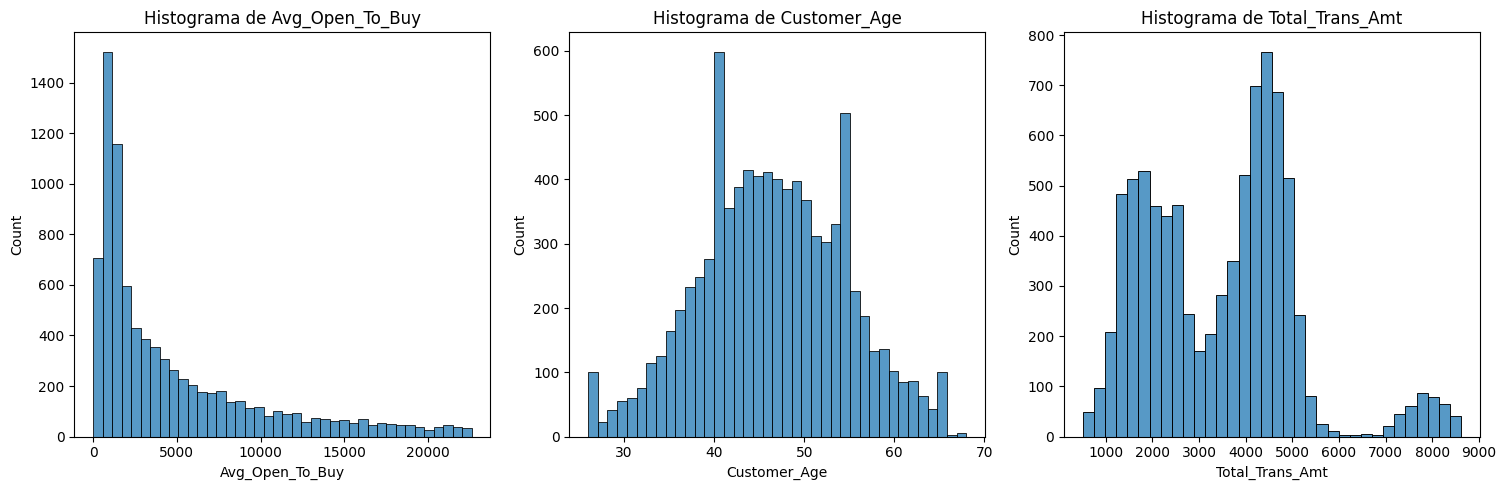

In [98]:
#Graficamos para ver como se comporta la variable sin outliers

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=data_noout, x='Avg_Open_To_Buy', ax=axes[0])
axes[0].set_title('Histograma de {}'.format('Avg_Open_To_Buy'))

sns.histplot(data=data_noout, x='Customer_Age', ax=axes[1])
axes[1].set_title('Histograma de {}'.format('Customer_Age'))

sns.histplot(data=data_noout, x='Total_Trans_Amt', ax=axes[2])
axes[2].set_title('Histograma de {}'.format('Total_Trans_Amt'))

plt.tight_layout()
plt.show()

In [99]:
#Cargamos libreria para hacer la normalizacion
from sklearn.preprocessing import power_transform

In [100]:
data_noout = data_noout[['Total_Trans_Amt','Avg_Open_To_Buy','Customer_Age']]

In [101]:
# aplicamos transformacion box-cox para normalizar nuestros datos
# busca generar la curva y que no haya tanta diferencia de rangos entre variables
# es importante por la distancia euclidiana en el modelo
data_bc = power_transform(X=data_noout, method='box-cox')
data_bc = pd.DataFrame(data_bc,columns=data_noout.columns)
data_bc

,Total_Trans_Amt,Avg_Open_To_Buy,Customer_Age
0,-1.725640,1.324480,-0.176018
1,-1.562347,0.878689,0.316779
2,-0.992028,0.187203,0.563061
3,-1.694774,-1.027240,-0.792486
4,-2.140271,0.471526,-0.792486
...,...,...,...
8451,2.290402,-0.073467,-1.656545
8452,2.086503,0.361499,0.316779
8453,2.104192,1.122130,0.686175
8454,1.436102,1.342318,1.055409


c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

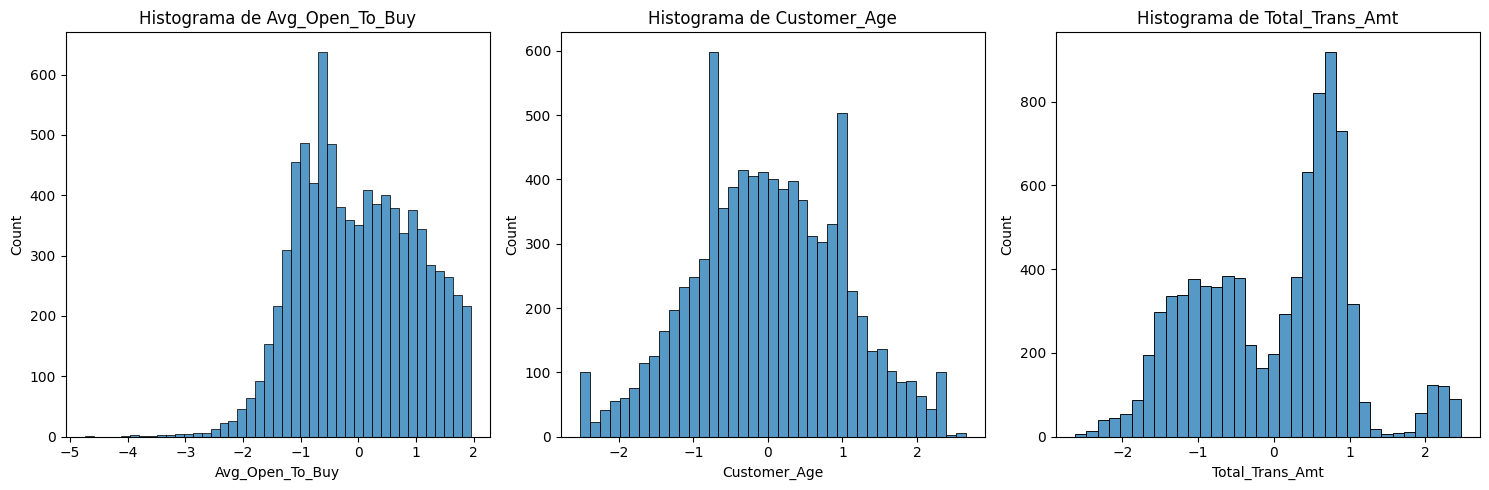

In [102]:
#Graficamos para observar los datos despues de la normalizacion 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=data_bc, x='Avg_Open_To_Buy', ax=axes[0])
axes[0].set_title('Histograma de {}'.format('Avg_Open_To_Buy'))

sns.histplot(data=data_bc, x='Customer_Age', ax=axes[1])
axes[1].set_title('Histograma de {}'.format('Customer_Age'))

sns.histplot(data=data_bc, x='Total_Trans_Amt', ax=axes[2])
axes[2].set_title('Histograma de {}'.format('Total_Trans_Amt'))

plt.tight_layout()
plt.show()

In [103]:
#Desplegamos las estadisticas de las variables normalizadas
data_bc.describe()

,Total_Trans_Amt,Avg_Open_To_Buy,Customer_Age
count,8.456000e+03,8.456000e+03,8.456000e+03
mean,1.613342e-16,-2.151123e-16,-8.344004e-16
std,1.000059e+00,1.000059e+00,1.000059e+00
min,-2.627117e+00,-4.737440e+00,-2.522007e+00
25%,-8.452983e-01,-7.849317e-01,-6.691473e-01
50%,2.605807e-01,-6.252210e-02,-5.278830e-02
75%,7.251381e-01,8.076170e-01,6.861748e-01
max,2.468029e+00,1.945516e+00,2.653751e+00


In [104]:
#Cargamos libreria para aplicar el método de Kmeans
from sklearn.cluster import KMeans

In [105]:
#Creamos dos listas vacias donde vamos a cargar los datos de inercia y el valor de k de cada una
inercia = []
ks = []

#Realizamos un modelo para cada valor k desde 1 a 15, calculamos la inercia y las almacenamos en las listas definidas
for k in range(1,15):
    modelo_iterado = KMeans(n_clusters = k, random_state = 5)
    modelo_iterado.fit(data_bc)
    inercia.append(modelo_iterado.inertia_)
    ks.append(k)

c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init

In [106]:
#construimos el dataframe con los valores encontrados anteriormente, esto para aplicar el metodo del codo 
codo = {

    'inercia': inercia,
    'k': ks
}

codo = pd.DataFrame(codo)

c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

<Axes: xlabel='k', ylabel='inercia'>

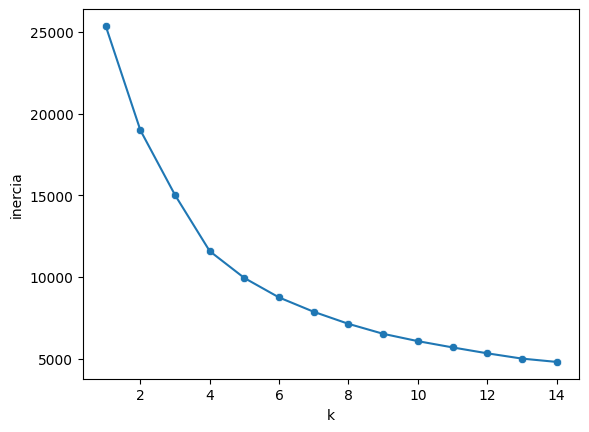

In [107]:
#Graficamos el dataframe para visualizar el momendo donde la linea se hace horizontal, esto es el metodo del codo
#Con esto determinamos el valor de k ideal para el modelo.
sns.scatterplot(data=codo, x='k', y='inercia',markers=True)
sns.lineplot(data=codo, x='k', y='inercia')

In [108]:
#No es muy definido el cambio pero se determina que el valor ideal de k es 5
#Creamos el modelo con 5 clusters
modelo = KMeans(n_clusters=5,random_state=10)
modelo.fit(data_bc)

c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=10)

In [109]:
#aqui deplegamos a que cluster pertenece cada dato
data_noout['cluster']=modelo.labels_
data_noout

C:\Users\pablo\AppData\Local\Temp\ipykernel_2992\2410264717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_noout['cluster']=modelo.labels_


,Total_Trans_Amt,Avg_Open_To_Buy,Customer_Age,cluster
0,1144,11914.0,45,4
1,1291,7392.0,49,4
2,1887,3418.0,51,3
3,1171,796.0,40,2
4,816,4716.0,40,4
...,...,...,...,...
8451,8130,2529.0,33,1
8452,7590,4167.0,49,1
8453,7636,9611.0,52,1
8454,6009,12140.0,55,1


In [110]:
#realizamos un conteo de cuantos datos hay en cada cluster creado, vemos que esta equilibrado
data_noout.groupby(by='cluster').count()

,Total_Trans_Amt,Avg_Open_To_Buy,Customer_Age
cluster,,,
0,2197,2197,2197
1,2057,2057,2057
2,1569,1569,1569
3,1334,1334,1334
4,1299,1299,1299


In [111]:
# el numero de cluster no nos dice nada, no es un orden ni nos indica quien consume mas por ejemplo
# tenemos que buscar hacerle sentido a los cluster para poder usarlos en algo del negocio.
data_noout.groupby(by='cluster').agg(['min','mean','max'])

Total_Trans_Amt                    Avg_Open_To_Buy                \
                    min         mean   max             min          mean   
cluster                                                                    
0                  1874  4523.384160  8618            10.0   1149.481020   
1                  2836  4811.638308  8609          2138.0   8819.931940   
2                   644  2944.743149  8102             3.0   1840.589930   
3                   530  1874.643928  4554            15.0   2799.609220   
4                   510  1847.595073  3534          1862.0  10255.647421   

                 Customer_Age                 
             max          min       mean max  
cluster                                       
0         3311.0           37  48.870733  65  
1        22611.0           29  47.069519  65  
2        11436.0           26  36.337157  46  
3        22616.0           43  55.604198  68  
4        22557.0           26  44.083911  61

### Caracteristicas de Clusters

Customer Age
* Joven adulto = desde 26 a 40
* Adulto = desde 37 a 50
* Mayor = desde 43 a 65

Descripciones
* 0 consumo medio, inicio bajo, edad adulto         C
* 1 consumo alto, inicio alto, edad joven           A
* 2 consumo bajo, inicio bajo, edad joven           D
* 3 consumo bajo, inicio bajo, edad mayor           E
* 4 consumo alto, inicio medio, edad joven          B
* 5 outliers                                        F

Todo esto depende de las reglas del negocio, aqui estamos especulando como podriamos clasificarlos


c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Total_Trans_Amt', ylabel='Avg_Open_To_Buy'>

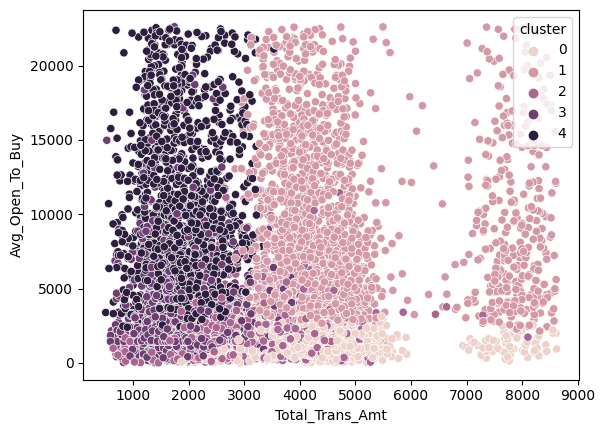

In [112]:
sns.scatterplot(data=data_noout, x='Total_Trans_Amt', y='Avg_Open_To_Buy',hue='cluster')

c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pablo\anaconda3\envs\reciente\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Total_Trans_Amt', ylabel='Customer_Age'>

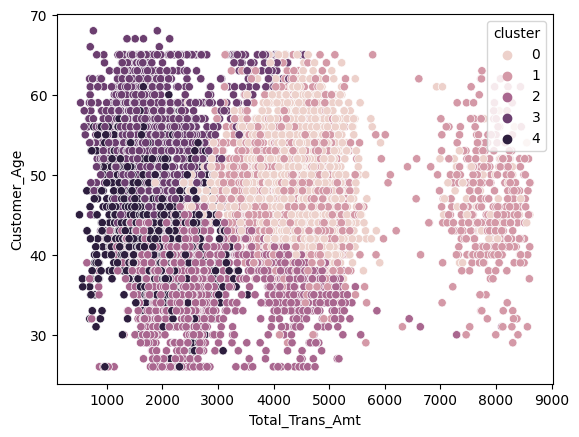

In [113]:
sns.scatterplot(data=data_noout, x='Total_Trans_Amt', y='Customer_Age',hue='cluster')

In [114]:
import plotly.express as px

In [115]:
fig = px.scatter_3d(data_noout, x = 'Total_Trans_Amt',
y = 'Avg_Open_To_Buy',
z = 'Customer_Age',
color = 'cluster')

fig.show()